# Activity 3

# Clustering around multiple dimensions

In [11]:
data <- read.csv("C:/Users/vivek/Box Sync/Spring 2017/587 DIC/LAB3/data/Wholesale customers data.csv")

In [9]:
# remove.packages(c("ggplot2", "data.table"))
# install.packages('Rcpp', dependencies = TRUE,repos="http://cran.r-project.org")
# install.packages('ggplot2',repos="http://cran.r-project.org")


In [3]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

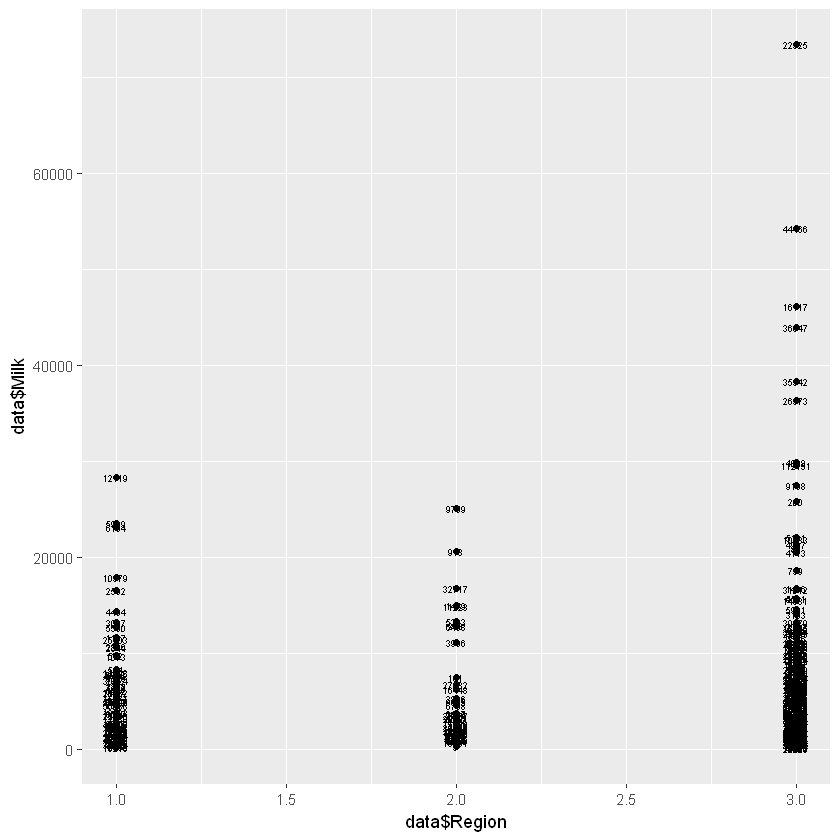

In [19]:
p1 <- ggplot(data=data, aes(x=data$Region,y = data$Milk))
p1 + geom_point()+geom_text(aes(label=data$Fresh), size =2)

In [22]:
head(data)
summary(data)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

Fresh goes from a min of 3 to a max of 112,151). Normalizing / scaling the data won’t necessarily
remove those outliers. Doing a log transformation might help. We could also remove those
customers completely. From a business perspective, you don’t really need a clustering
algorithm to identify what your top customers are buying. You usually need clustering and
segmentation for your middle 50%

# Removing the top 5 customers from each category. 
We’ll use a custom function and create a new data set called data.rm.top

In [23]:
top.n.custs <- function (data,cols,n=5) { #Requires some data frame and the top N to remove
    idx.to.remove <-integer(0) #Initialize a vector to hold customers being removed
        for (c in cols){ # For every column in the data we passed to this function
            col.order <-order(data[,c],decreasing=T) #Sort column "c" in descending order (bigger on top)
            #Order returns the sorted index (e.g. row 15, 3, 7, 1, ...) rather than the actual values sorted.
            idx <-head(col.order, n) #Take the first n of the sorted column C to
            idx.to.remove <-union(idx.to.remove,idx) #Combine and de-duplicate the row ids that need to be removed
        }#In every iteration remove the outlyers
    return(idx.to.remove) #Return the indexes of customers to be removed
}#END OF FUNCTION
top.custs <-top.n.custs(data,cols=3:8,n=5)
length(top.custs) #How Many Customers to be Removed?
data[top.custs,] #Examine the customers
data.rm.top<-data[-c(top.custs),] #Remove the Customers

[1] 19

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
182,1,3,112151,29627,18148,16745,4948,8550
126,1,3,76237,3473,7102,16538,778,918
285,1,3,68951,4411,12609,8692,751,2406
40,1,3,56159,555,902,10002,212,2916
259,1,1,56083,4563,2124,6422,730,3321
87,2,3,22925,73498,32114,987,20070,903
48,2,3,44466,54259,55571,7782,24171,6465
86,2,3,16117,46197,92780,1026,40827,2944
184,1,3,36847,43950,20170,36534,239,47943
62,2,3,35942,38369,59598,3254,26701,2017


Now, using data.rm.top, we can perform the cluster analysis.  Important note: We’ll still need to drop the Channel and Region variables.  These are two ID fields and are not useful in clustering

# After removing top 5 customers

In [28]:
summary(data.rm.top)

    Channel          Region          Fresh            Milk      
 Min.   :1.000   Min.   :1.000   Min.   :    3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.: 3067   1st Qu.: 1492  
 Median :1.000   Median :3.000   Median : 8040   Median : 3587  
 Mean   :1.321   Mean   :2.537   Mean   :10753   Mean   : 5112  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:15615   3rd Qu.: 7027  
 Max.   :2.000   Max.   :3.000   Max.   :53205   Max.   :29892  
    Grocery          Frozen      Detergents_Paper   Delicassen  
 Min.   :    3   Min.   :   25   Min.   :    3    Min.   :   3  
 1st Qu.: 2146   1st Qu.:  688   1st Qu.:  256    1st Qu.: 396  
 Median : 4602   Median : 1457   Median :  811    Median : 898  
 Mean   : 7135   Mean   : 2599   Mean   : 2547    Mean   :1261  
 3rd Qu.: 9965   3rd Qu.: 3242   3rd Qu.: 3843    3rd Qu.:1697  
 Max.   :39694   Max.   :17866   Max.   :19410    Max.   :7844  

In [29]:
summary(data)

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

In [25]:
set.seed(76964057) #Set the seed for reproducibility
k <-kmeans(data.rm.top[,-c(1,2)], centers=5) #Create 5 clusters, Remove columns 1 and 2
k$centers #Display&nbsp;cluster centers
table(k$cluster) #Give a count of data points in each cluster

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,4189.747,7645.639,11015.277,1335.145,4750.4819,1387.1205
2,16470.870,3026.491,4264.741,3217.306,996.5556,1319.7593
3,33120.163,4896.977,5579.860,3823.372,945.4651,1620.1860
4,5830.214,15295.048,23449.167,1936.452,10361.6429,1912.7381
5,5043.434,2329.683,2786.138,2689.814,652.8276,849.8414



  1   2   3   4   5 
 83 108  43  42 145 

Now we can start interpreting the cluster results:
• Cluster 1 looks to be a heavy Grocery and above average Detergents_Paper but low
Fresh foods.
• Cluster 3 is dominant in the Fresh category.
• Cluster 5 might be either the “junk drawer” catch-all cluster or it might represent the
small customers.

A measurement that is more relative would be the withinss and betweenss.<br>
withinss would tell you the sum of the square of the distance from each data point to the cluster center.<br>  Lower is better. <br> Seeing a high withinss would indicate either outliers are in your data or you need to create more clusters.<br>
betweenss tells you the sum of the squared distance between cluster centers.<br>  Ideally you want cluster centers far apart from each other.<br><br>
It’s important to try other values for K.<br>  You can then compare withinss and betweenss.  This will help you select the best K. <br>  For example, with this data set, what if you ran K from 2 through 20 and plotted the total within sum of squares? <br> You should find an “elbow” point.  <br> 

In [2]:
# rng<-2:20 #K from 2 to 20
# tries <-100 #Run the K Means algorithm 100 times
# avg.totw.ss <-integer(length(rng)) #Set up an empty vector to hold all of points
# for(v in rng){ # For each value of the range variable
#  v.totw.ss <-integer(tries) #Set up an empty vector to hold the 100 tries
#  for(i in 1:tries){
#  k.temp <-kmeans(data.rm.top,centers=v) #Run kmeans
#  v.totw.ss[i] <-k.temp$tot.withinss#Store the total withinss
#  }
#  avg.totw.ss[v-1] <-mean(v.totw.ss) #Average the 100 total withinss
# }
# plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K",
#  ylab="Average Total Within Sum of Squares",
#  xlab="Value of K")Wherever the graph bends and stops making gains in withinss you call that your K.

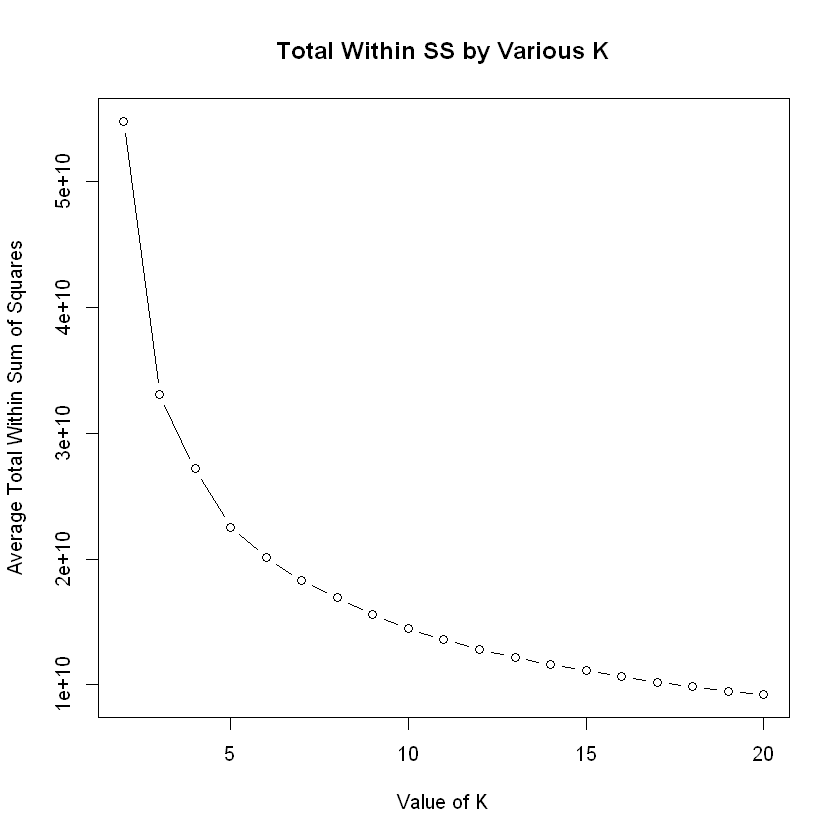

In [26]:
rng<-2:20 #K from 2 to 20
tries <-100 #Run the K Means algorithm 100 times
avg.totw.ss <-integer(length(rng)) #Set up an empty vector to hold all of points
for(v in rng){ # For each value of the range variable
 v.totw.ss <-integer(tries) #Set up an empty vector to hold the 100 tries
 for(i in 1:tries){
     k.temp <-kmeans(data.rm.top,centers=v) #Run kmeans
     v.totw.ss[i] <-k.temp$tot.withinss#Store the total withinss
 }
 avg.totw.ss[v-1] <-mean(v.totw.ss) #Average the 100 total withinss
}
plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K",
 ylab="Average Total Within Sum of Squares",
 xlab="Value of K")

This plot doesn’t show a very strong elbow.  Somewhere around K = 5 we start losing dramatic gains.  So I’m satisfied with 5 clusters.
You now have all of the bare bones for using kmeans clustering in R.
Here’s the full code for this tutorial.